In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


In [3]:
df_sg = pd.read_parquet('../data/clean/sg_explode.parquet.gzip')

In [4]:
df_sg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85904 entries, 0 to 85903
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        85904 non-null  object 
 1   title         85904 non-null  object 
 2   price         85904 non-null  float64
 3   id            85904 non-null  int32  
 4   developer     85904 non-null  object 
 5   release_year  85904 non-null  int32  
dtypes: float64(1), int32(2), object(3)
memory usage: 3.3+ MB


In [5]:
df_sg.describe()

,price,id,release_year
count,85904.000000,8.590400e+04,85904.000000
mean,9.062905,4.731740e+05,2015.079787
std,18.279639,1.696590e+05,2.929119
min,0.000000,1.000000e+01,1970.000000
25%,2.990000,3.550500e+05,2015.000000
50%,4.990000,4.753400e+05,2016.000000
75%,9.990000,6.042000e+05,2017.000000
max,995.000000,2.028850e+06,2021.000000


In [6]:
# Contar la cantidad de 'genres' y la frecuencia de genero.
df_sg['genres'].value_counts() 

genres
Indie                17187
Action               12471
Casual                9169
Adventure             8880
Simulation            7390
                     ...  
Real Time Tactics        1
Dystopian                1
Games Workshop           1
Lemmings                 1
Turn-Based Combat        1
Name: count, Length: 317, dtype: int64

In [7]:
# Describe para 'price'
print(df_sg['price'].describe())


count    85904.000000
mean         9.062905
std         18.279639
min          0.000000
25%          2.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64


In [8]:
# Describe para 'release_year'
print(df_sg['release_year'].describe())

count    85904.000000
mean      2015.079787
std          2.929119
min       1970.000000
25%       2015.000000
50%       2016.000000
75%       2017.000000
max       2021.000000
Name: release_year, dtype: float64


In [9]:
# Describe para 'id'
print(df_sg['id'].describe())

count    8.590400e+04
mean     4.731740e+05
std      1.696590e+05
min      1.000000e+01
25%      3.550500e+05
50%      4.753400e+05
75%      6.042000e+05
max      2.028850e+06
Name: id, dtype: float64


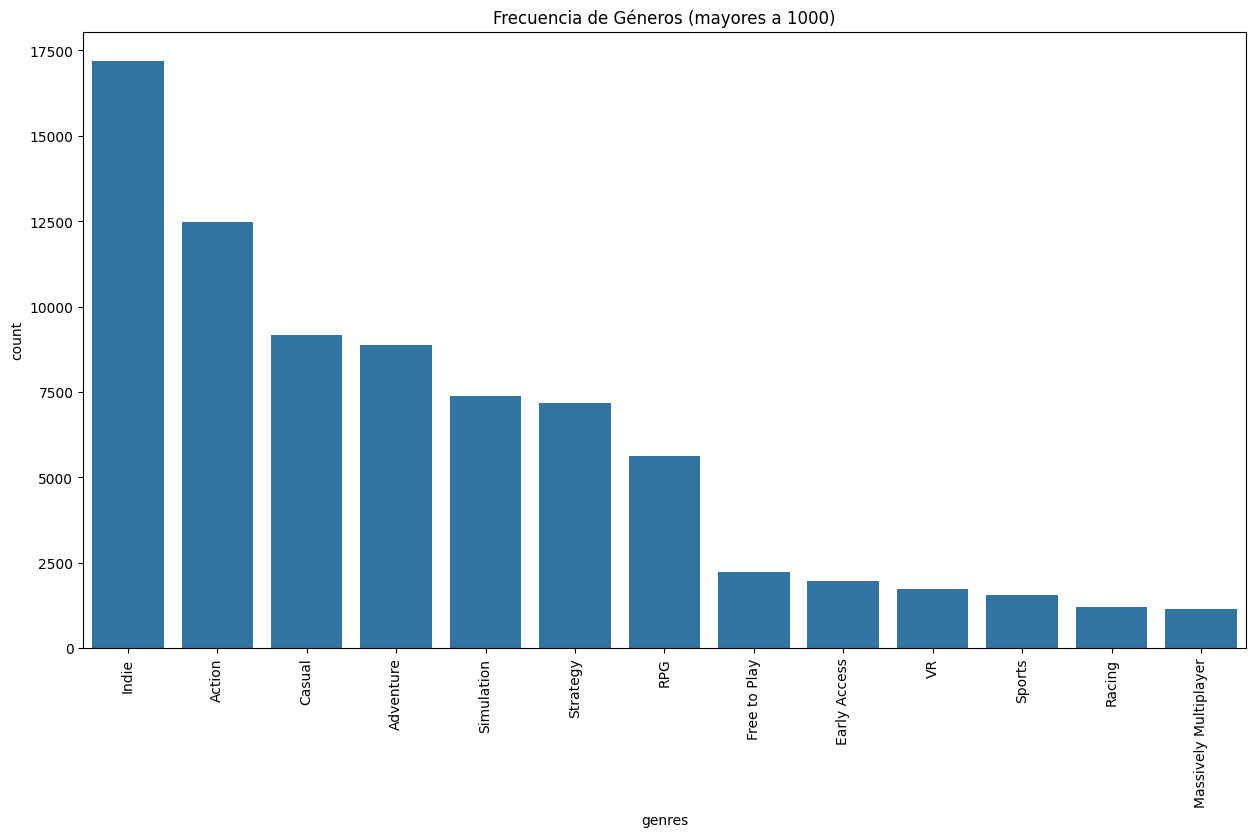

In [10]:
# Gráfico de barras para 'genres' (frecuencia) más frecuentes mayores a 100
plt.figure(figsize=(15, 8))
sns.countplot(x='genres', data=df_sg, order=df_sg['genres'].value_counts().index[df_sg['genres'].value_counts() > 1000])
plt.title('Frecuencia de Géneros (mayores a 1000)')
plt.xticks(rotation=90)
plt.show()

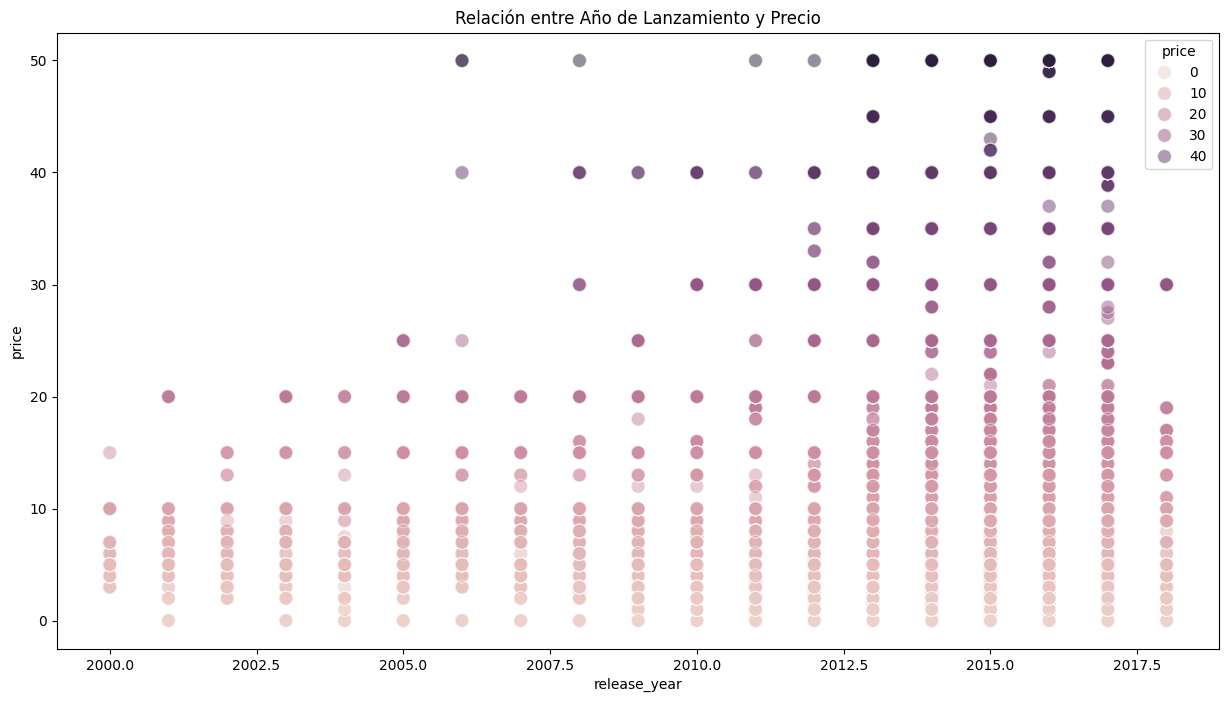

In [11]:
# Gráfico de dispersión para 'price' vs 'release_year'
plt.figure(figsize=(15, 8))
sns.scatterplot(x='release_year', y='price', data=df_sg[(df_sg['release_year'] >= 2000) & (df_sg['release_year'] <= 2018) & (df_sg['price'] < 50)], hue='price', alpha=0.5, s=100)
plt.title('Relación entre Año de Lanzamiento y Precio')
plt.show()

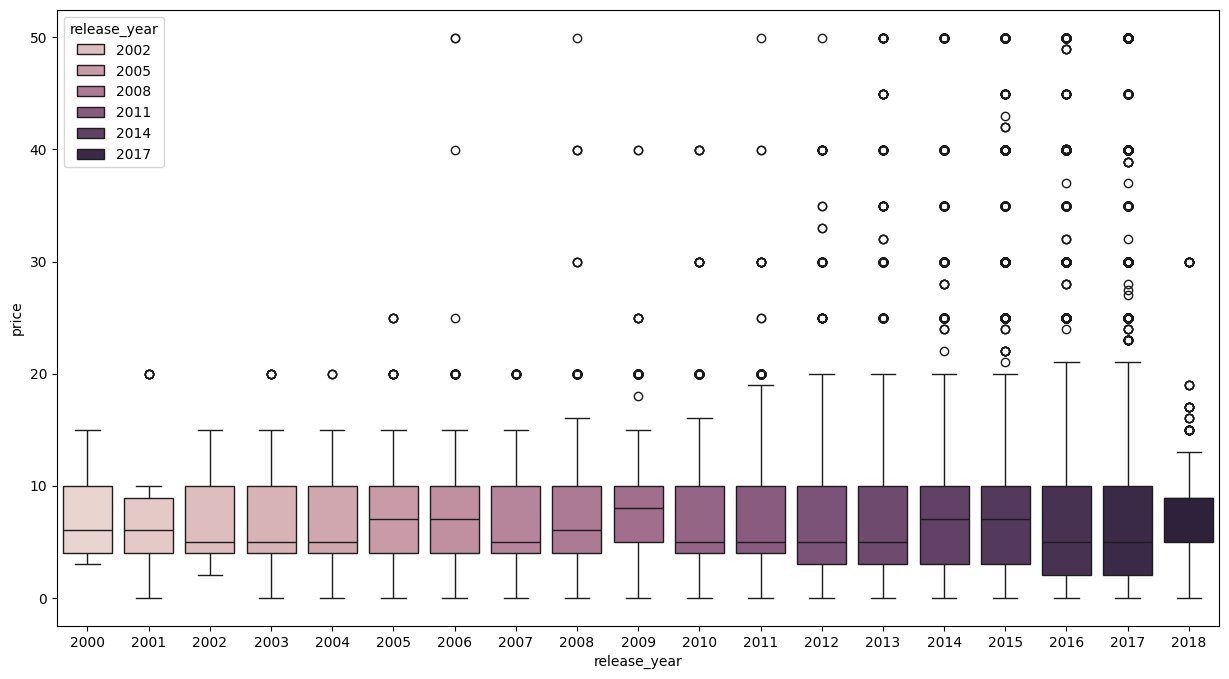

In [12]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='release_year', y='price', data=df_sg[(df_sg['release_year'] >= 2000) & (df_sg['release_year'] <= 2018) & (df_sg['price'] < 50)], hue='release_year')
plt.show()

In [13]:
# Quiero agrupar 'genres' y 'title' y evitar repetir
df_sg.groupby(['genres', 'title']).size().reset_index().rename(columns={0:'count'})

,genres,title,count
0,1980s,Dangerous Men,1
1,1980s,Dirty Dancing,1
2,1980s,Empire State,1
3,1980s,Kickboxer,1
4,1980s,Kung Fury,1
...,...,...,...
85860,e-sports,Racket: Nx,1
85861,e-sports,Smackitball,1
85862,e-sports,Steam Controller,1
85863,e-sports,Unforgiven VR,1


In [14]:
df_sg.groupby(['genres', 'title']).size().reset_index().rename(columns={0:'count'}).sort_values(by='count', ascending=False)

,genres,title,count
53164,Indie,The Dream Machine: Chapter 4,2
488,Action,AirMech® Soundtrack,2
66941,Simulation,Colony,2
69231,Simulation,New York Bus Simulator,2
42051,Indie,Dark Matter,2
...,...,...,...
28628,Casual,Rocksmith® 2014 – Biffy Clyro - “Stingin’ Belle”,1
28627,Casual,Rocksmith® 2014 – Biffy Clyro - “Mountains”,1
28626,Casual,Rocksmith® 2014 – Biffy Clyro - “Many of Horror”,1
28625,Casual,Rocksmith® 2014 – Biffy Clyro - “Bubbles”,1


In [15]:
# Agrupar 'title' por 'genre' y contar la cantidad de 'title' por 'genre'
df_sg.groupby(['genres'])['title'].count().reset_index().rename(columns={'title':'count'}).sort_values(['count'], ascending=False)


,genres,count
139,Indie,17187
12,Action,12471
48,Casual,9169
16,Adventure,8880
246,Simulation,7390
...,...,...
278,Time Manipulation,1
145,Lemmings,1
144,Lara Croft,1
285,Trading Card Game,1


In [16]:
df_genres_count = pd.DataFrame(df_sg.groupby(['genres'])['title'].count().reset_index().rename(columns={'title':'count'}).sort_values(['count'], ascending=False))

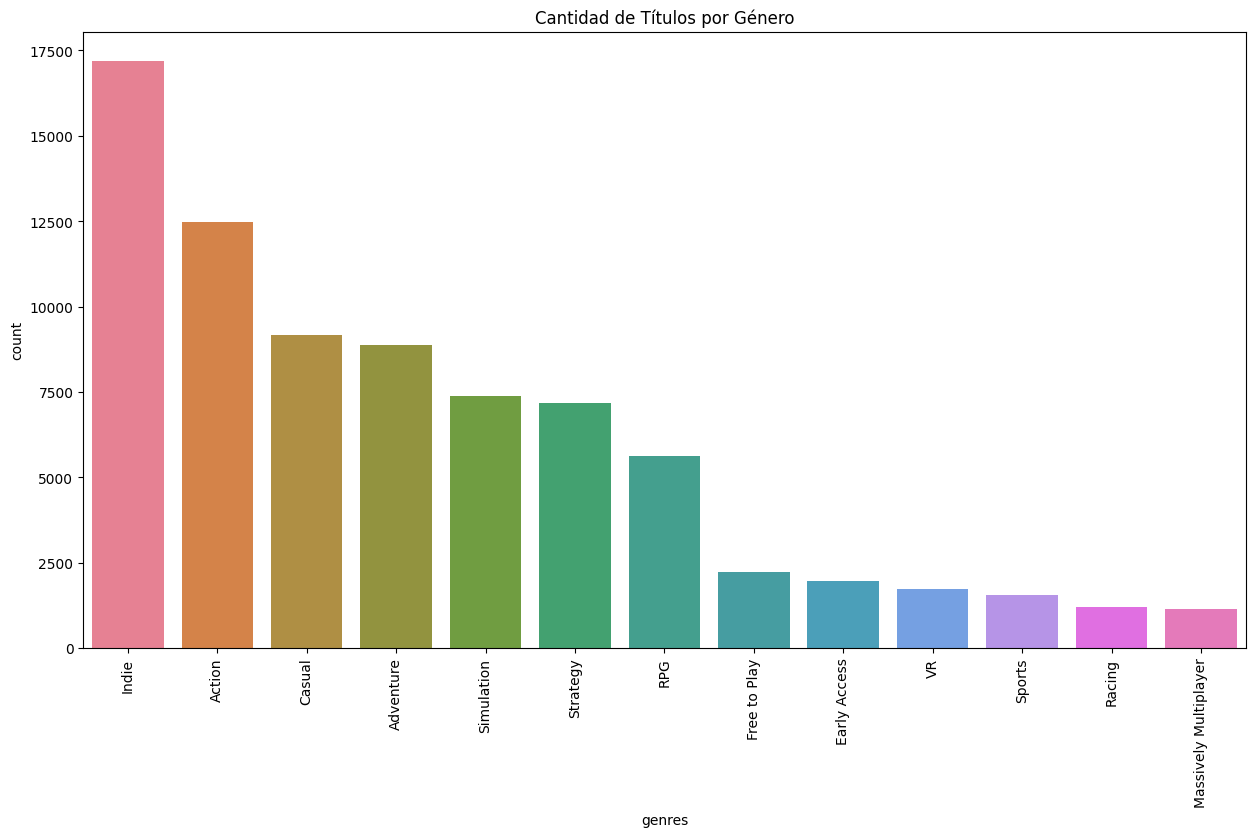

In [17]:

plt.figure(figsize=(15, 8))
sns.barplot(x='genres', y='count', data=df_genres_count[df_genres_count['count'] > 1000], hue='genres')
plt.xticks(rotation=90)
plt.title('Cantidad de Títulos por Género')
plt.show()

In [18]:
df_sg.groupby('genres')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
1980s,13.0,9.452308,8.827238,0.00,3.99,4.990,11.9900,29.99
1990's,11.0,4.535455,1.213560,3.99,3.99,3.990,4.4900,7.99
2D,16.0,7.490625,11.887949,0.00,2.99,2.990,5.7400,49.99
2D Fighter,1.0,14.990000,NaN,14.99,14.99,14.990,14.9900,14.99
360 Video,24.0,0.829167,1.235359,0.00,0.00,0.000,1.9900,4.99
...,...,...,...,...,...,...,...,...
World War I,1.0,1.990000,NaN,1.99,1.99,1.990,1.9900,1.99
World War II,9.0,14.325556,19.395318,0.00,1.99,4.990,14.9900,49.99
Zombies,32.0,10.519375,9.462695,0.00,3.74,6.490,19.1725,39.99


In [19]:
df_sg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85904 entries, 0 to 85903
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        85904 non-null  object 
 1   title         85904 non-null  object 
 2   price         85904 non-null  float64
 3   id            85904 non-null  int32  
 4   developer     85904 non-null  object 
 5   release_year  85904 non-null  int32  
dtypes: float64(1), int32(2), object(3)
memory usage: 3.3+ MB


In [20]:
group_by_genres = df_sg.groupby('genres')['title']

In [21]:
df_genres = pd.DataFrame(group_by_genres, columns=['genres', 'title'])

In [22]:
df_genres

,genres,title
0,1980s,11435 Da...
1,1990's,1021 Sonic 3 &amp; Knuckles 14023...
2,2D,913 F...
3,2D Fighter,"42643 Bloody Zombies Name: title, dtype: ob..."
4,360 Video,24197 SourVR Video Player Deluxe Edit...
...,...,...
312,World War I,"14941 Canis Belli Name: title, dtype: object"
313,World War II,2808 War Thunder...
314,Zombies,8496 ...
315,e-sports,2646 Dota 2 17283 Racke...


In [23]:
df_genres['count_genres'] = df_genres['genres'].map(group_by_genres.apply(len))

In [24]:
df_genres

,genres,title,count_genres
0,1980s,11435 Da...,13
1,1990's,1021 Sonic 3 &amp; Knuckles 14023...,11
2,2D,913 F...,16
3,2D Fighter,"42643 Bloody Zombies Name: title, dtype: ob...",1
4,360 Video,24197 SourVR Video Player Deluxe Edit...,24
...,...,...,...
312,World War I,"14941 Canis Belli Name: title, dtype: object",1
313,World War II,2808 War Thunder...,9
314,Zombies,8496 ...,32
315,e-sports,2646 Dota 2 17283 Racke...,6


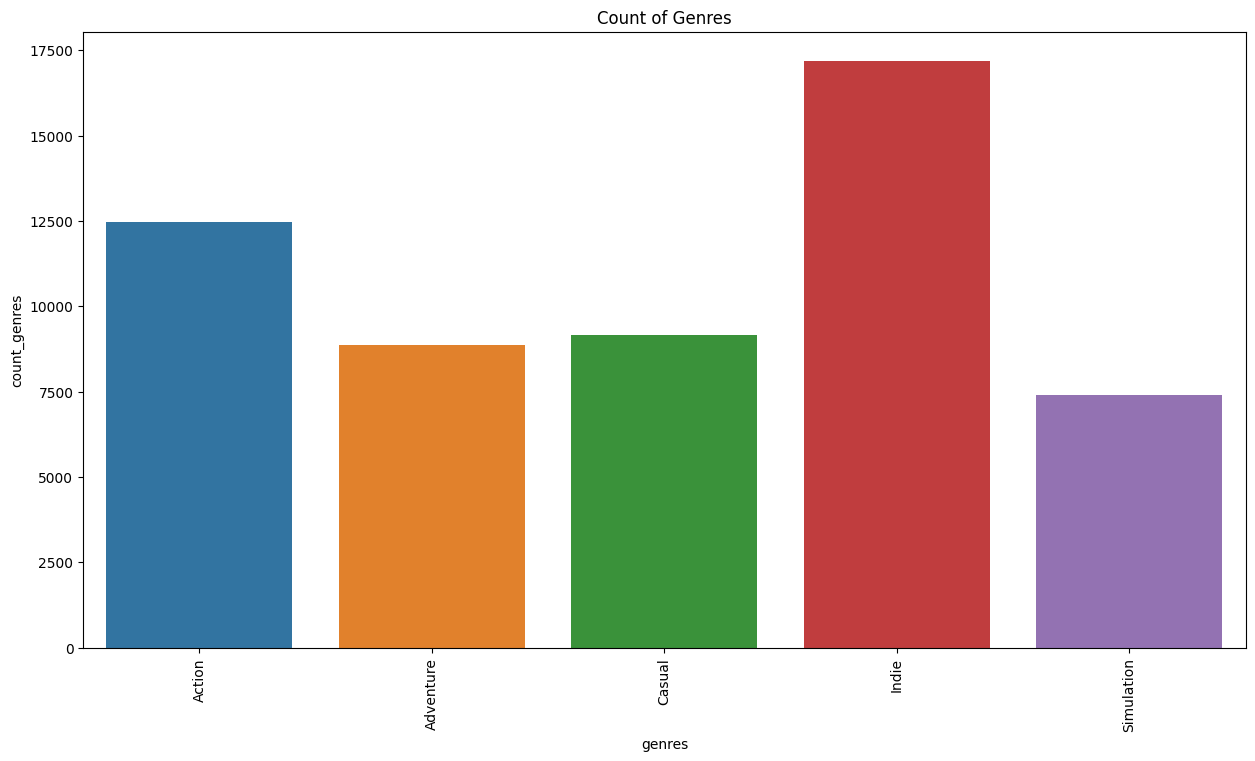

In [25]:
plt.figure(figsize=(15, 8)) 
sns.barplot(data=df_genres[df_genres['count_genres']> 7200], x='genres', y='count_genres', hue='genres')
plt.title('Count of Genres')
plt.xticks(rotation=90)
plt.show()

# EDA user_reviews

In [26]:
df_ur = pd.read_parquet('../data/clean/user_reviews.parquet.gzip')

In [27]:
df_ur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             59305 non-null  object
 1   item_id             59305 non-null  int32 
 2   recommend           59305 non-null  bool  
 3   sentiment_analysis  59305 non-null  int64 
dtypes: bool(1), int32(1), int64(1), object(1)
memory usage: 1.2+ MB


In [28]:
df_ur.describe()

,item_id,sentiment_analysis
count,59305.000000,59305.00000
mean,169935.176511,1.39484
std,132029.464174,0.63849
min,10.000000,0.00000
25%,8930.000000,1.00000
50%,218230.000000,1.00000
75%,261760.000000,2.00000
max,527340.000000,2.00000


In [29]:
# Contar cuantas recomendaciones hizo cada usuario usando 'user_id' y 'recommend'
df_ur.groupby(['user_id', 'recommend']).size().reset_index().rename(columns={0:'count'}).sort_values(['count'], ascending=False)

,user_id,recommend,count
6315,76561198064484479,True,20
17026,Letachal,True,20
21858,chicken_tonight,True,20
22236,dannysfatass,True,20
11547,76561198094665607,True,18
...,...,...,...
11467,76561198094132116,True,1
11466,76561198094111845,True,1
11464,76561198094090475,True,1
11463,76561198094077205,True,1


In [30]:
user_recommend = pd.DataFrame(df_ur.groupby(['user_id', 'recommend']).size().reset_index().rename(columns={0:'count'}).sort_values(['count'], ascending=False))

<Axes: title={'center': 'Distribución de Count'}, ylabel='Frequency'>

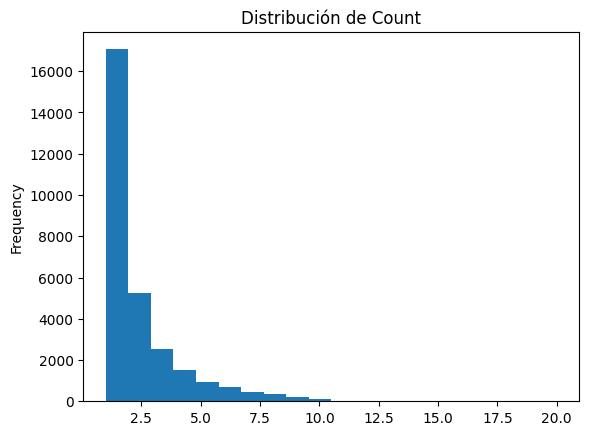

In [31]:
# Histograma para una columna numérica, por ejemplo, 'count'
user_recommend['count'].plot(kind='hist', bins=20, title='Distribución de Count')


In [32]:
# Quiero aplicar estadistica descriptiva a la columna 'count'
user_recommend['count'].describe()

count    29142.000000
mean         2.035035
std          1.761657
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         20.000000
Name: count, dtype: float64

In [33]:
df_sg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85904 entries, 0 to 85903
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        85904 non-null  object 
 1   title         85904 non-null  object 
 2   price         85904 non-null  float64
 3   id            85904 non-null  int32  
 4   developer     85904 non-null  object 
 5   release_year  85904 non-null  int32  
dtypes: float64(1), int32(2), object(3)
memory usage: 3.3+ MB


In [34]:
df_ur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             59305 non-null  object
 1   item_id             59305 non-null  int32 
 2   recommend           59305 non-null  bool  
 3   sentiment_analysis  59305 non-null  int64 
dtypes: bool(1), int32(1), int64(1), object(1)
memory usage: 1.2+ MB
